# Lab Segmentation 1

In [2]:
from commonfunctions import *
import skimage.io as io
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Requirement 1

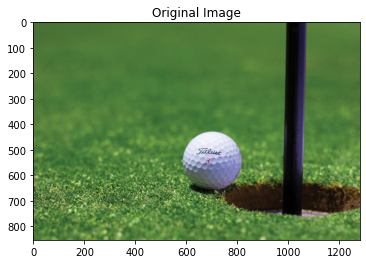

In [87]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
# read image golf
image = io.imread('./imgs/exp1/golf.jpeg')
show_images([image],["Original Image"])
image = image.astype(float)

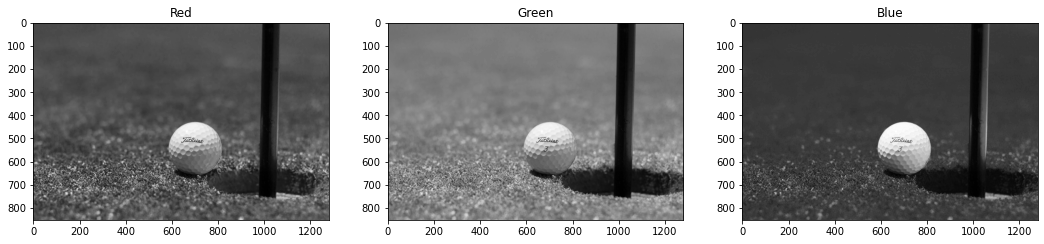

lower threshold= 135 upper threshold= 140


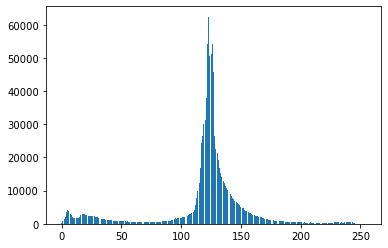

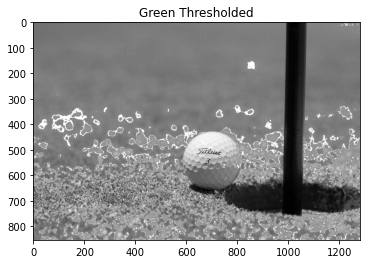

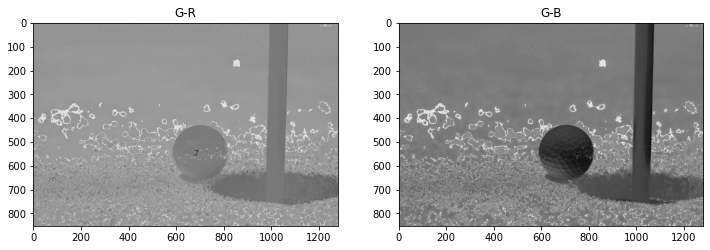

lower threshold= 20 upper threshold= 11


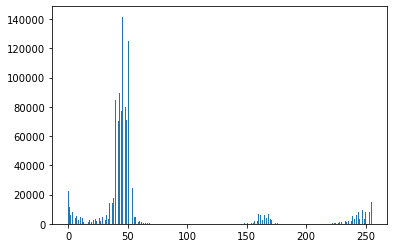

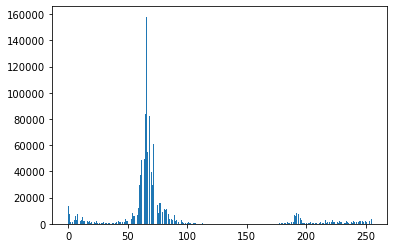

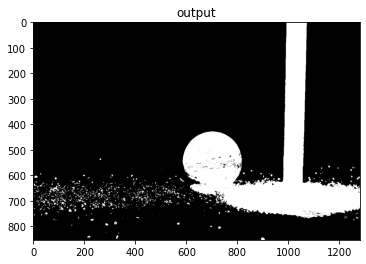

In [88]:
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
show_images([R,G,B],['Red','Green','Blue'])
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# ->  Green
#4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
histGreen = histogram(G,nbins=256) # get histogram
showHist(G) # show histogram
histGreen  = histGreen[0]
threshold1 = histGreen.tolist().index(max(histGreen[135:140]),135) # get threshold
threshold2 = histGreen.tolist().index(max(histGreen[140:150]),140) # get threshold
G[np.logical_and(G>threshold1,G<threshold2)] = 255
print("lower threshold=",threshold1,"upper threshold=",threshold2)
show_images([G],['Green Thresholded'])
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
d1 = G-R
d2 = G-B
show_images([d1,d2],['G-R','G-B'])
d1_hist = histogram(d1,nbins=256)
d2_hist = histogram(d2,nbins=256)
showHist(d1)
showHist(d2)
threshold1 = d1_hist[0].tolist().index(min(d1_hist[0][20:50]),20)
threshold2 = d2_hist[0].tolist().index(min(d2_hist[0][10:50]),10)
print("lower threshold=",threshold1,"upper threshold=",threshold2)
out = np.zeros(G.shape)
out[np.logical_or(d1<=threshold1, d2<=threshold2)] = 255

# 6- display the binarized image
show_images([out],['output'])





### Requirement 2

In [63]:
# 1- Get the required RGB color (Using a color picker)
pixelValue = [86,101,42]
# 2- Read image
image_cufe = io.imread('./imgs/exp2/cufe.png')
# 3- extract R, G and B channels (as float)
R_float = image_cufe[:,:,0].astype(float)
G_float = image_cufe[:,:,1].astype(float)
B_float = image_cufe[:,:,2].astype(float)

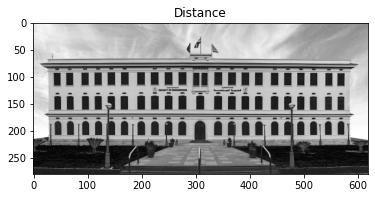

threshold =  32


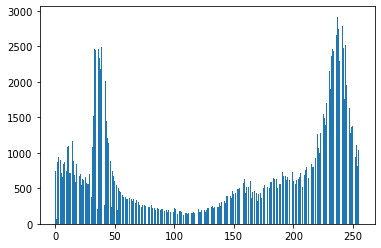

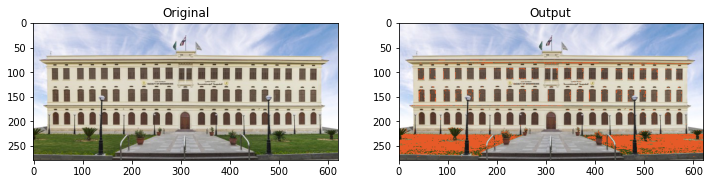

In [64]:
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_R = np.zeros((R_float.shape[0],R_float.shape[1]))
diff_G = np.zeros((G_float.shape[0],G_float.shape[1]))
diff_B = np.zeros((B_float.shape[0],B_float.shape[1]))

for x in range(diff_R.shape[0]):
    for y in range(diff_R.shape[1]):
        diff_R[x,y] = pixelValue[0] - R_float[x,y]
        diff_G[x,y] = pixelValue[1] - G_float[x,y]
        diff_B[x,y] = pixelValue[2] - B_float[x,y]
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
output_image = np.copy(image_cufe)
distance = np.zeros((diff_R.shape[0],diff_R.shape[1]))

# 6-  create a mask by thresholding the differences
for x in range(distance.shape[0]):
    for y in range(distance.shape[1]):
        distance[x,y] = np.sqrt((diff_R[x,y])**2 + (diff_G[x,y])**2 + (diff_B[x,y])**2)
show_images([distance],['Distance'])
showHist(distance)
distHist = histogram(distance,nbins=256)
distHist = distHist[0]
distThreshold = distHist.tolist().index(max(distHist[0:100]))
print("threshold = ",distThreshold)

thres_distance = distance <distThreshold #distance after thresholding

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
output_image[thres_distance == 1,0] = 230 
output_image[thres_distance == 1,1] = 90 
output_image[thres_distance == 1,2] = 40 
# for x in range(thres_distance.shape[0]):
#     for y in range(thres_distance.shape[1]):
#         if thres_distance[x,y] == True:
#             output_image[x,y,0] = 230
#             output_image[x,y,1] = 90
#             output_image[x,y,2] = 40

# 8- show the image or save it
show_images([image_cufe,output_image],["Original","Output"])